[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1CCi8qoFQA-e355RDZ1iCgSi-2Dkd8gof#scrollTo=aWOXtTdDf26F)


In [1]:
!git clone https://github.com/brandontan99/Self_Love_App.git
%cd /content/Self_Love_App

Cloning into 'Self_Love_App'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 114 (delta 64), reused 23 (delta 11), pack-reused 0
Receiving objects: 100% (114/114), 529.88 KiB | 4.91 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/Self_Love_App


In [2]:
'''from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Machine\ Learning/Self_Love_App'''

"from google.colab import drive\ndrive.mount('/content/gdrive')\n%cd /content/gdrive/MyDrive/Machine\\ Learning/Self_Love_App"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from data_cleaning import data_cleaning
from Data_Normalization import data_encoding, data_normalization
import time

#Getting our cleaned data from data_cleaning.py

In [4]:
df = pd.read_csv("WID3006 ML Questionnaire.csv")
df = data_cleaning(df)
df = data_encoding(df)
df_norm = data_normalization(df)
df_norm

,Gender: _Male,What is your current occupation?_Retired,What is your current occupation?_Unemployed,What is your current occupation?_University student,What boosts your confidence ? _By leading others to success,What boosts your confidence ? _Get the most/ special attention among the members,What boosts your confidence ? _When someone acknowledges you,What boosts your confidence ? _When you accomplish a project,I prefer to spend my money on...._Food,I prefer to spend my money on...._Home Improvements,I prefer to spend my money on...._The latest fashion,I prefer to spend my money on...._The latest technology,How do you organize your thoughts? Please pick whichever is closest._I make a chart or graph,How do you organize your thoughts? Please pick whichever is closest._I talk to myself out loud,How do you organize your thoughts? Please pick whichever is closest._I write it down in my calendar,How do you organize your thoughts? Please pick whichever is closest._Jotting it down on a scrap of paper,Choose a pet which you prefer to keep._Cat,Choose a pet which you prefer to keep._Dog,Choose a pet which you prefer to keep._Fish,Choose a pet which you prefer to keep._Hamster,Choose a pet which you prefer to keep._Horse,Choose a pet which you prefer to keep._I'm not a pet person,Choose a pet which you prefer to keep._Rabbit,Choose a pet which you prefer to keep._Snake,Choose a pet which you prefer to keep._Tortoise,What is your favorite time of the day?_Evening,What is your favorite time of the day?_Morning,What is your favorite time of the day?_Night,Would you rather visit the future or the past?_The future,Would you rather visit the future or the past?_The past,What do you worry more about the most?_Money,What do you worry more about the most?_The state of the world,What do you worry more about the most?_Your family and friends,What do you worry more about the most?_Your future,"When you retire, you'd like to live..._Exactly where I live now","When you retire, you'd like to live..._In a hectic big city","When you retire, you'd like to live..._In a small town","When you retire, you'd like to live..._Overseas","When you retire, you'd like to live..._Traveling the world",What is your favorite color?_Blue,...,What is your learning style? (Pick one that benefit you the most)_By doing assignments,What is your learning style? (Pick one that benefit you the most)_By doing tutorial/lab questions,What is your learning style? (Pick one that benefit you the most)_By reading a physical book,What is your learning style? (Pick one that benefit you the most)_By reading an e-Book,Do you enjoy socializing with large groups of people?,Do you enjoy challenges?,How creative of a person do you think you are?,How logical of a person do you think you are?,Would you prefer to engage your brain more than your body?,Are you a curious person?,Are you a perfectionist?,Are you a trusting person?,Do you have lot of patience?,Do you organize your schedule well?,Do you like to sit in front of a computer for long hours?,Do you enjoy making others happy?,Can you understand others' perspectives and feelings?,How confident are you in your own abilities?,Badminton,Playing computer games,Playing board games,Reading,Team sports,Exercising,Writing,Dancing,Gardening,Painting,Cooking,Singing,Puzzles,Collecting,Fishing,Watching movies,Watching TV series,Sleeping,Photography and Videography,Listening to music,Crocheting,Playing a musical instrument
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.25,0.50,0.75,0.75,0.75,0.666667,0.75,0.75,0.75,0.75,1.00,0.75,0.50,0.50,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.75,0.75,0.75

#Removing unwanted columns

In [5]:
#Set to true to remove column, then restart the entire runtime
remove = {
    'Gender: _Female': False,
    'Gender: _Male': False,
    #'What is your current occupation?_Employed': True,
    'What is your current occupation?_Retired': True,
    'What is your current occupation?_Unemployed': True,
    'What is your current occupation?_University student': True,
    'What boosts your confidence ? _By earning a lot of money': False,
    'What boosts your confidence ? _By leading others to success': False,
    'What boosts your confidence ? _Get the most/ special attention among the members': False,
    'What boosts your confidence ? _Owning famous brands': False,
    'What boosts your confidence ? _When someone acknowledges you': False,
    'What boosts your confidence ? _When you accomplish a project': False,
    'I prefer to spend my money on...._Activities with friends': False,
    'I prefer to spend my money on...._Food': False,
    'I prefer to spend my money on...._Home Improvements': False,
    'I prefer to spend my money on...._The latest fashion': False,
    'I prefer to spend my money on...._The latest technology': False,
    'How do you organize your thoughts? Please pick whichever is closest._Any combination of these': False,
    'How do you organize your thoughts? Please pick whichever is closest._I make a chart or graph': False,
    'How do you organize your thoughts? Please pick whichever is closest._I talk to myself out loud': False,
    'How do you organize your thoughts? Please pick whichever is closest._I write it down in my calendar': False,
    'How do you organize your thoughts? Please pick whichever is closest._Jotting it down on a scrap of paper': False,
    'Choose a pet which you prefer to keep._Bird': False,
    'Choose a pet which you prefer to keep._Cat': False,
    'Choose a pet which you prefer to keep._Dog': False,
    'Choose a pet which you prefer to keep._Fish': False,
    'Choose a pet which you prefer to keep._Hamster': False,
    'Choose a pet which you prefer to keep._Horse': False,
    "Choose a pet which you prefer to keep._I'm not a pet person": False,
    'Choose a pet which you prefer to keep._Rabbit': False,
    'Choose a pet which you prefer to keep._Snake': False,
    'Choose a pet which you prefer to keep._Tortoise': False,
    'What is your favorite time of the day?_Afternoon': False,
    'What is your favorite time of the day?_Evening': False,
    'What is your favorite time of the day?_Morning': False,
    'What is your favorite time of the day?_Night': False,
    'Would you rather visit the future or the past?_Neither. I prefer the present': False,
    'Would you rather visit the future or the past?_The future': False,
    'Would you rather visit the future or the past?_The past': False,
    'What do you worry more about the most?_How others see me': False,
    'What do you worry more about the most?_Money': False,
    'What do you worry more about the most?_The state of the world': False,
    'What do you worry more about the most?_Your family and friends': False,
    'What do you worry more about the most?_Your future': False,
    "When you retire, you'd like to live..._Cabin in the woods": False,
    "When you retire, you'd like to live..._Exactly where I live now": False,
    "When you retire, you'd like to live..._In a hectic big city": False,
    "When you retire, you'd like to live..._In a small town": False,
    "When you retire, you'd like to live..._Overseas": False,
    "When you retire, you'd like to live..._Traveling the world": False,
    'What is your favorite color?_Black' 'What is your favorite color?_Blue': False,
    'What is your favorite color?_Green': False,
    'What is your favorite color?_Purple' 'What is your favorite color?_Red': False,
    'What is your favorite color?_White': False,
    'What is your favorite color?_Yellow': False,
    'What is your learning style? (Pick one that benefit you the most)_By attending lectures': False,
    'What is your learning style? (Pick one that benefit you the most)_By attending online courses': False,
    'What is your learning style? (Pick one that benefit you the most)_By doing assignments': False,
    'What is your learning style? (Pick one that benefit you the most)_By doing tutorial/lab questions': False,
    'What is your learning style? (Pick one that benefit you the most)_By reading a physical book': False,
    'What is your learning style? (Pick one that benefit you the most)_By reading an e-Book': False,
    'Do you enjoy socializing with large groups of people?': False,
    'Do you enjoy challenges?': False,
    'How creative of a person do you think you are?': False,
    'How logical of a person do you think you are?': False,
    'Would you prefer to engage your brain more than your body?': False,
    'Are you a curious person?' 'Are you a perfectionist?': False,
    'Are you a trusting person?' 'Do you have lot of patience?': False,
    'Do you organize your schedule well?': False,
    'Do you like to sit in front of a computer for long hours?': False,
    'Do you enjoy making others happy?': False,
    "Can you understand others' perspectives and feelings?": False,
    'Team sports': False,
    'Badminton': False,
    'Dancing': False,
    'Fishing': False,
    'Playing computer games': False,
    'Playing board games': False, 
    'Reading': False,
    'Exercising': False,
    'Writing': False,
    'Gardening': False,
    'Painting': False,
    'Cooking': False,
    'Singing': False,
    'Puzzles': False,
    'Collecting': False,
    'Watching movies': False,
    'Watching TV series': False,
    'Sleeping': False,
    'Photography and Videography': False,
    'Listening to music': False,
    'Crocheting': False,
    'Playing a musical instrument': False
}

for column in remove:
    if remove[column] == True:
        df_norm = df_norm.drop(column, axis=1)
        print('Removed', column)

df_norm

Removed What is your current occupation?_Retired
Removed What is your current occupation?_Unemployed
Removed What is your current occupation?_University student


,Gender: _Male,What boosts your confidence ? _By leading others to success,What boosts your confidence ? _Get the most/ special attention among the members,What boosts your confidence ? _When someone acknowledges you,What boosts your confidence ? _When you accomplish a project,I prefer to spend my money on...._Food,I prefer to spend my money on...._Home Improvements,I prefer to spend my money on...._The latest fashion,I prefer to spend my money on...._The latest technology,How do you organize your thoughts? Please pick whichever is closest._I make a chart or graph,How do you organize your thoughts? Please pick whichever is closest._I talk to myself out loud,How do you organize your thoughts? Please pick whichever is closest._I write it down in my calendar,How do you organize your thoughts? Please pick whichever is closest._Jotting it down on a scrap of paper,Choose a pet which you prefer to keep._Cat,Choose a pet which you prefer to keep._Dog,Choose a pet which you prefer to keep._Fish,Choose a pet which you prefer to keep._Hamster,Choose a pet which you prefer to keep._Horse,Choose a pet which you prefer to keep._I'm not a pet person,Choose a pet which you prefer to keep._Rabbit,Choose a pet which you prefer to keep._Snake,Choose a pet which you prefer to keep._Tortoise,What is your favorite time of the day?_Evening,What is your favorite time of the day?_Morning,What is your favorite time of the day?_Night,Would you rather visit the future or the past?_The future,Would you rather visit the future or the past?_The past,What do you worry more about the most?_Money,What do you worry more about the most?_The state of the world,What do you worry more about the most?_Your family and friends,What do you worry more about the most?_Your future,"When you retire, you'd like to live..._Exactly where I live now","When you retire, you'd like to live..._In a hectic big city","When you retire, you'd like to live..._In a small town","When you retire, you'd like to live..._Overseas","When you retire, you'd like to live..._Traveling the world",What is your favorite color?_Blue,What is your favorite color?_Green,What is your favorite color?_Purple,What is your favorite color?_Red,...,What is your learning style? (Pick one that benefit you the most)_By doing assignments,What is your learning style? (Pick one that benefit you the most)_By doing tutorial/lab questions,What is your learning style? (Pick one that benefit you the most)_By reading a physical book,What is your learning style? (Pick one that benefit you the most)_By reading an e-Book,Do you enjoy socializing with large groups of people?,Do you enjoy challenges?,How creative of a person do you think you are?,How logical of a person do you think you are?,Would you prefer to engage your brain more than your body?,Are you a curious person?,Are you a perfectionist?,Are you a trusting person?,Do you have lot of patience?,Do you organize your schedule well?,Do you like to sit in front of a computer for long hours?,Do you enjoy making others happy?,Can you understand others' perspectives and feelings?,How confident are you in your own abilities?,Badminton,Playing computer games,Playing board games,Reading,Team sports,Exercising,Writing,Dancing,Gardening,Painting,Cooking,Singing,Puzzles,Collecting,Fishing,Watching movies,Watching TV series,Sleeping,Photography and Videography,Listening to music,Crocheting,Playing a musical instrument
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.25,0.50,0.75,0.75,0.75,0.666667,0.75,0.75,0.75,0.75,1.00,0.75,0.50,0.50,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.75,0.75,0.75,0.75,0.50,1.000000,1.00,0.50,0.7

In [6]:
# Personality Traits
hobby_index = df_norm.columns.get_loc('Badminton')
traits = df_norm.iloc[:, 0:hobby_index]
# Hobbies
hobbies = df_norm.iloc[:, hobby_index:]

In [7]:
traits

,Gender: _Male,What boosts your confidence ? _By leading others to success,What boosts your confidence ? _Get the most/ special attention among the members,What boosts your confidence ? _When someone acknowledges you,What boosts your confidence ? _When you accomplish a project,I prefer to spend my money on...._Food,I prefer to spend my money on...._Home Improvements,I prefer to spend my money on...._The latest fashion,I prefer to spend my money on...._The latest technology,How do you organize your thoughts? Please pick whichever is closest._I make a chart or graph,How do you organize your thoughts? Please pick whichever is closest._I talk to myself out loud,How do you organize your thoughts? Please pick whichever is closest._I write it down in my calendar,How do you organize your thoughts? Please pick whichever is closest._Jotting it down on a scrap of paper,Choose a pet which you prefer to keep._Cat,Choose a pet which you prefer to keep._Dog,Choose a pet which you prefer to keep._Fish,Choose a pet which you prefer to keep._Hamster,Choose a pet which you prefer to keep._Horse,Choose a pet which you prefer to keep._I'm not a pet person,Choose a pet which you prefer to keep._Rabbit,Choose a pet which you prefer to keep._Snake,Choose a pet which you prefer to keep._Tortoise,What is your favorite time of the day?_Evening,What is your favorite time of the day?_Morning,What is your favorite time of the day?_Night,Would you rather visit the future or the past?_The future,Would you rather visit the future or the past?_The past,What do you worry more about the most?_Money,What do you worry more about the most?_The state of the world,What do you worry more about the most?_Your family and friends,What do you worry more about the most?_Your future,"When you retire, you'd like to live..._Exactly where I live now","When you retire, you'd like to live..._In a hectic big city","When you retire, you'd like to live..._In a small town","When you retire, you'd like to live..._Overseas","When you retire, you'd like to live..._Traveling the world",What is your favorite color?_Blue,What is your favorite color?_Green,What is your favorite color?_Purple,What is your favorite color?_Red,What is your favorite color?_White,What is your favorite color?_Yellow,What is your learning style? (Pick one that benefit you the most)_By attending online courses,What is your learning style? (Pick one that benefit you the most)_By doing assignments,What is your learning style? (Pick one that benefit you the most)_By doing tutorial/lab questions,What is your learning style? (Pick one that benefit you the most)_By reading a physical book,What is your learning style? (Pick one that benefit you the most)_By reading an e-Book,Do you enjoy socializing with large groups of people?,Do you enjoy challenges?,How creative of a person do you think you are?,How logical of a person do you think you are?,Would you prefer to engage your brain more than your body?,Are you a curious person?,Are you a perfectionist?,Are you a trusting person?,Do you have lot of patience?,Do you organize your schedule well?,Do you like to sit in front of a computer for long hours?,Do you enjoy making others happy?,Can you understand others' perspectives and feelings?,How confident are you in your own abilities?
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.25,0.50,0.75,0.75,0.75,0.666667,0.75,0.75,0.75,0.75,1.00,0.75,0.50,0.50
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.75,0.75,0.75,0.50,1.000000,1.00,0.50,0.75,0.75,0.75,1.00,0.75,1.00
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [8]:
hobbies

,Badminton,Playing computer games,Playing board games,Reading,Team sports,Exercising,Writing,Dancing,Gardening,Painting,Cooking,Singing,Puzzles,Collecting,Fishing,Watching movies,Watching TV series,Sleeping,Photography and Videography,Listening to music,Crocheting,Playing a musical instrument
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y=hobbies.sum().values
print(y)
print(list(hobbies.columns.values))

[ 47.  81.  36. 108.  24.  71.  36.  35.  12.  37.  53.  56.  32.  21.
   4.   6.   9.   8.   3.   4.   1.   3.]
['Badminton', 'Playing computer games', 'Playing board games', 'Reading', 'Team sports', 'Exercising', 'Writing', 'Dancing', 'Gardening', 'Painting', 'Cooking', 'Singing', 'Puzzles', 'Collecting', 'Fishing', 'Watching movies', 'Watching TV series', 'Sleeping', 'Photography and Videography', 'Listening to music', 'Crocheting', 'Playing a musical instrument']


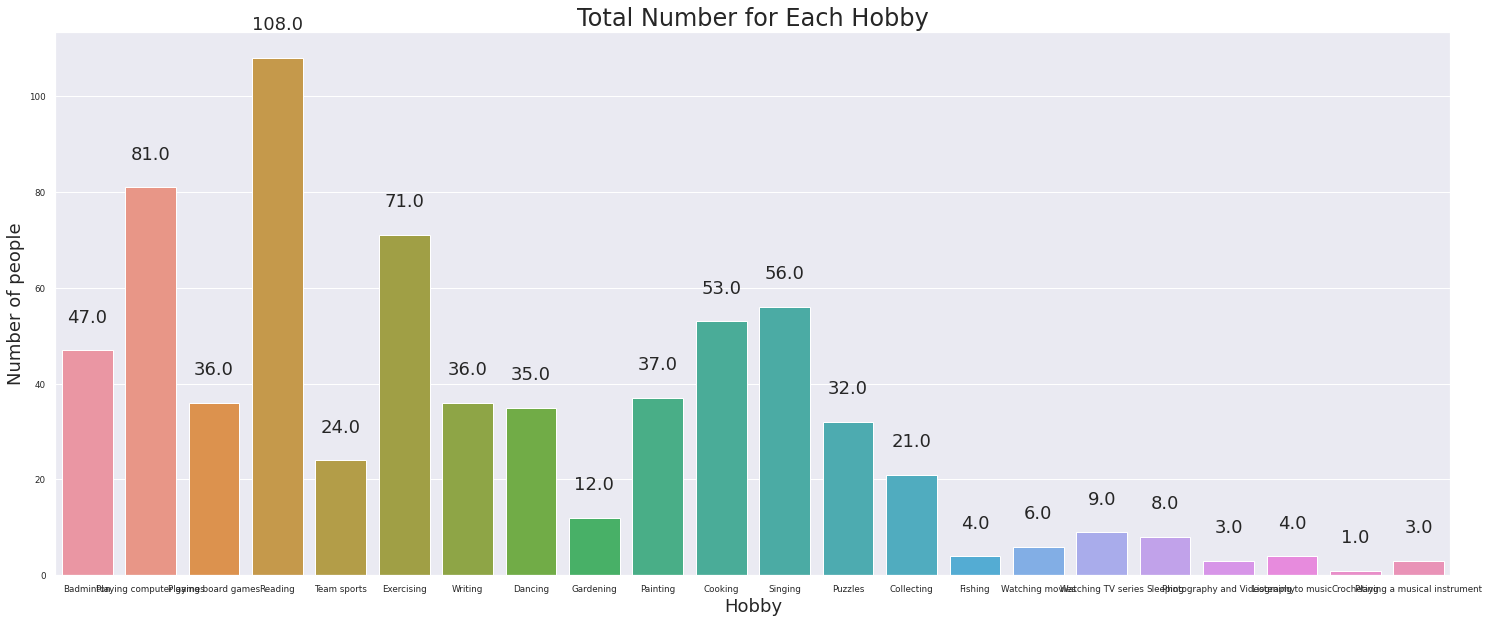

In [10]:
#Overview of data
categories = list(hobbies.columns.values)
sns.set(font_scale = 0.8)
plt.figure(figsize=(25,10))
ax= sns.barplot(x=categories, y=hobbies.sum().values)
plt.title("Total Number for Each Hobby", fontsize=24)
plt.ylabel('Number of people', fontsize=18)
plt.xlabel('Hobby', fontsize=18)
#adding the text labels
rects = ax.patches
labels = hobbies.sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_norm, random_state=1, test_size=0.25, shuffle=True)
hobby_index = df_norm.columns.get_loc('Badminton')
x_train = train.iloc[:, :hobby_index]
y_train = train.iloc[:, hobby_index:]

x_test = test.iloc[:, :hobby_index]
y_test = test.iloc[:, hobby_index:]

In [12]:
x_train

,Gender: _Male,What boosts your confidence ? _By leading others to success,What boosts your confidence ? _Get the most/ special attention among the members,What boosts your confidence ? _When someone acknowledges you,What boosts your confidence ? _When you accomplish a project,I prefer to spend my money on...._Food,I prefer to spend my money on...._Home Improvements,I prefer to spend my money on...._The latest fashion,I prefer to spend my money on...._The latest technology,How do you organize your thoughts? Please pick whichever is closest._I make a chart or graph,How do you organize your thoughts? Please pick whichever is closest._I talk to myself out loud,How do you organize your thoughts? Please pick whichever is closest._I write it down in my calendar,How do you organize your thoughts? Please pick whichever is closest._Jotting it down on a scrap of paper,Choose a pet which you prefer to keep._Cat,Choose a pet which you prefer to keep._Dog,Choose a pet which you prefer to keep._Fish,Choose a pet which you prefer to keep._Hamster,Choose a pet which you prefer to keep._Horse,Choose a pet which you prefer to keep._I'm not a pet person,Choose a pet which you prefer to keep._Rabbit,Choose a pet which you prefer to keep._Snake,Choose a pet which you prefer to keep._Tortoise,What is your favorite time of the day?_Evening,What is your favorite time of the day?_Morning,What is your favorite time of the day?_Night,Would you rather visit the future or the past?_The future,Would you rather visit the future or the past?_The past,What do you worry more about the most?_Money,What do you worry more about the most?_The state of the world,What do you worry more about the most?_Your family and friends,What do you worry more about the most?_Your future,"When you retire, you'd like to live..._Exactly where I live now","When you retire, you'd like to live..._In a hectic big city","When you retire, you'd like to live..._In a small town","When you retire, you'd like to live..._Overseas","When you retire, you'd like to live..._Traveling the world",What is your favorite color?_Blue,What is your favorite color?_Green,What is your favorite color?_Purple,What is your favorite color?_Red,What is your favorite color?_White,What is your favorite color?_Yellow,What is your learning style? (Pick one that benefit you the most)_By attending online courses,What is your learning style? (Pick one that benefit you the most)_By doing assignments,What is your learning style? (Pick one that benefit you the most)_By doing tutorial/lab questions,What is your learning style? (Pick one that benefit you the most)_By reading a physical book,What is your learning style? (Pick one that benefit you the most)_By reading an e-Book,Do you enjoy socializing with large groups of people?,Do you enjoy challenges?,How creative of a person do you think you are?,How logical of a person do you think you are?,Would you prefer to engage your brain more than your body?,Are you a curious person?,Are you a perfectionist?,Are you a trusting person?,Do you have lot of patience?,Do you organize your schedule well?,Do you like to sit in front of a computer for long hours?,Do you enjoy making others happy?,Can you understand others' perspectives and feelings?,How confident are you in your own abilities?
165,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.50,0.50,0.25,0.50,0.50,0.666667,0.75,0.25,0.00,0.50,0.00,0.50,0.50,0.50
112,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.50,0.25,0.75,0.50,0.666667,0.75,0.75,0.75,0.00,0.75,0.75,0.75,0.00
42,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [13]:
y_train

,Badminton,Playing computer games,Playing board games,Reading,Team sports,Exercising,Writing,Dancing,Gardening,Painting,Cooking,Singing,Puzzles,Collecting,Fishing,Watching movies,Watching TV series,Sleeping,Photography and Videography,Listening to music,Crocheting,Playing a musical instrument
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
140,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Defining the Model



In [14]:
X = traits.to_numpy()
y = hobbies.to_numpy()
print(X.shape)
print(y.shape)

(192, 61)
(192, 22)


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score, f1_score

# Model taken from: https://machinelearningmastery.com/multi-label-classification-with-deep-learning/
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(10, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
    return model

In [16]:
X = traits.to_numpy()
y = hobbies.to_numpy()
n_inputs, n_outputs = X.shape[1], y.shape[1]
view_model = get_model(n_inputs, n_outputs)
view_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                620       
_________________________________________________________________
dense_1 (Dense)              (None, 22)                242       
Total params: 862
Trainable params: 862
Non-trainable params: 0
_________________________________________________________________


In [17]:
def build_model(embedding_matrix):
    words = Input(shape=(None,))
    x = Embedding(*embedding_matrix.shape, weights=[embedding_matrix], trainable=False)(words)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(CuDNNGRU(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)

    hidden = concatenate([
        GlobalMaxPooling1D()(x),
        GlobalAveragePooling1D()(x),
    ])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    result = Dense(6, activation='sigmoid')(hidden)
    
    
    model = Model(inputs=words, outputs=result)
    model.compile(loss='binary_crossentropy', optimizer='adam')

    return model

#Training the Model
Absolutely shit accuracy btw

In [18]:
# Evaluation procedure taken from: https://machinelearningmastery.com/multi-label-classification-with-deep-learning/
def evaluate_model(X, y):
    accuracy = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    # https://machinelearningmastery.com/k-fold-cross-validation/
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        # define model
        model = get_model(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=0, epochs=300)
        # make a prediction on the test set
        yhat = model(X_test)
        # round probabilities to class labels
        yhat = tf.round(yhat)
        # calculate accuracy
        acc = f1_score(y_test, yhat, average='micro')
        # store result
        print('>%.3f' % acc)
        accuracy.append(acc)
    return accuracy, model

X = traits.to_numpy()
y = hobbies.to_numpy()

accuracy, trained_model = evaluate_model(X,y)

print('Accuracy: %.3f (%.3f)' % (np.mean(accuracy), np.std(accuracy)))

>0.349
>0.367
>0.211
>0.362
>0.295
>0.291
>0.345
>0.323
>0.267
>0.383
>0.362
>0.250
>0.244
>0.378
>0.368
>0.298
>0.302
>0.319
>0.367
>0.280
>0.333
>0.348
>0.396
>0.272
>0.367
>0.370
>0.261
>0.208
>0.362
>0.353
Accuracy: 0.321 (0.052)


#Using the model to predict results

In [19]:
traits[0:5]

,Gender: _Male,What boosts your confidence ? _By leading others to success,What boosts your confidence ? _Get the most/ special attention among the members,What boosts your confidence ? _When someone acknowledges you,What boosts your confidence ? _When you accomplish a project,I prefer to spend my money on...._Food,I prefer to spend my money on...._Home Improvements,I prefer to spend my money on...._The latest fashion,I prefer to spend my money on...._The latest technology,How do you organize your thoughts? Please pick whichever is closest._I make a chart or graph,How do you organize your thoughts? Please pick whichever is closest._I talk to myself out loud,How do you organize your thoughts? Please pick whichever is closest._I write it down in my calendar,How do you organize your thoughts? Please pick whichever is closest._Jotting it down on a scrap of paper,Choose a pet which you prefer to keep._Cat,Choose a pet which you prefer to keep._Dog,Choose a pet which you prefer to keep._Fish,Choose a pet which you prefer to keep._Hamster,Choose a pet which you prefer to keep._Horse,Choose a pet which you prefer to keep._I'm not a pet person,Choose a pet which you prefer to keep._Rabbit,Choose a pet which you prefer to keep._Snake,Choose a pet which you prefer to keep._Tortoise,What is your favorite time of the day?_Evening,What is your favorite time of the day?_Morning,What is your favorite time of the day?_Night,Would you rather visit the future or the past?_The future,Would you rather visit the future or the past?_The past,What do you worry more about the most?_Money,What do you worry more about the most?_The state of the world,What do you worry more about the most?_Your family and friends,What do you worry more about the most?_Your future,"When you retire, you'd like to live..._Exactly where I live now","When you retire, you'd like to live..._In a hectic big city","When you retire, you'd like to live..._In a small town","When you retire, you'd like to live..._Overseas","When you retire, you'd like to live..._Traveling the world",What is your favorite color?_Blue,What is your favorite color?_Green,What is your favorite color?_Purple,What is your favorite color?_Red,What is your favorite color?_White,What is your favorite color?_Yellow,What is your learning style? (Pick one that benefit you the most)_By attending online courses,What is your learning style? (Pick one that benefit you the most)_By doing assignments,What is your learning style? (Pick one that benefit you the most)_By doing tutorial/lab questions,What is your learning style? (Pick one that benefit you the most)_By reading a physical book,What is your learning style? (Pick one that benefit you the most)_By reading an e-Book,Do you enjoy socializing with large groups of people?,Do you enjoy challenges?,How creative of a person do you think you are?,How logical of a person do you think you are?,Would you prefer to engage your brain more than your body?,Are you a curious person?,Are you a perfectionist?,Are you a trusting person?,Do you have lot of patience?,Do you organize your schedule well?,Do you like to sit in front of a computer for long hours?,Do you enjoy making others happy?,Can you understand others' perspectives and feelings?,How confident are you in your own abilities?
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.25,0.50,0.75,0.75,0.75,0.666667,0.75,0.75,0.75,0.75,1.00,0.75,0.50,0.50
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.75,0.75,0.75,0.50,1.000000,1.00,0.50,0.75,0.75,0.75,1.00,0.75,1.00
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [20]:
hobbies[0:5]

,Badminton,Playing computer games,Playing board games,Reading,Team sports,Exercising,Writing,Dancing,Gardening,Painting,Cooking,Singing,Puzzles,Collecting,Fishing,Watching movies,Watching TV series,Sleeping,Photography and Videography,Listening to music,Crocheting,Playing a musical instrument
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
test_sample = traits[0:5]
predictions = tf.round(trained_model.predict(x=test_sample, batch_size=10, verbose=0))
predictions

<tf.Tensor: shape=(5, 22), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)>

#Confusion Matrix
Sklearn implementation of confusion matrix is not supported for multilabel classification

In [22]:
cm_plot_labels = list(hobbies.columns.values)
cm_plot_labels

['Badminton',
 'Playing computer games',
 'Playing board games',
 'Reading',
 'Team sports',
 'Exercising',
 'Writing',
 'Dancing',
 'Gardening',
 'Painting',
 'Cooking',
 'Singing',
 'Puzzles',
 'Collecting',
 'Fishing',
 'Watching movies',
 'Watching TV series',
 'Sleeping',
 'Photography and Videography',
 'Listening to music',
 'Crocheting',
 'Playing a musical instrument']

In [23]:

%matplotlib inline
from sklearn.metrics import multilabel_confusion_matrix
import itertools
import matplotlib.pyplot as plt

rounded_predictions = tf.round(trained_model.predict(x=X, batch_size=10, verbose=0))
cm_plot_labels = [1,0]
cm = multilabel_confusion_matrix(y_true=y, y_pred=rounded_predictions, labels=cm_plot_labels)
print(cm)


[[[ 84  27]
  [ 30  51]]

 [[132  13]
  [ 33  14]]]


#Saving the model

In [30]:
trained_model.save('model/trained_model.h5')